In [2]:
!ls

data	  dataset.py	      LICENSE	 requirements.txt
data.dvc  explore_data.ipynb  README.md


In [24]:
import os
import glob
import json
import imageio
import matplotlib.pyplot as plt

In [6]:
with open("data/raw/train/train_v1.0.json") as train_json:
    train_dict = json.load(train_json)

In [10]:
train_dict.keys(), len(train_dict)

(dict_keys(['dataset_name', 'dataset_version', 'dataset_split', 'data']), 4)

In [14]:
train_dict["dataset_name"], train_dict["dataset_version"], train_dict["dataset_split"], train_dict["data"][0]

('docvqa',
 '1.0',
 'train',
 {'questionId': 337,
  'question': 'what is the date mentioned in this letter?',
  'image': 'documents/xnbl0037_1.png',
  'docId': 279,
  'ucsf_document_id': 'xnbl0037',
  'ucsf_document_page_no': '1',
  'answers': ['1/8/93'],
  'data_split': 'train'})

In [26]:
sample = train_dict["data"][0]
train_path = "data/raw/train/"
image_path = train_path + str(sample["image"])
image = imageio.imread(image_path)

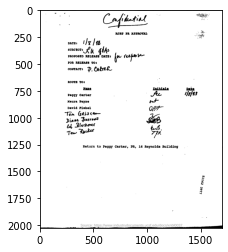

In [27]:
plt.imshow(image, cmap="gray")

In [30]:
ocr_path = os.path.join(train_path, "ocr_results", os.path.basename(image_path)[:-4] + ".json")

with open(ocr_path) as ocr_file:
    ocr = json.load(ocr_file)

In [31]:
ocr

{'status': 'Succeeded',
 'recognitionResults': [{'page': 1,
   'clockwiseOrientation': 359.79,
   'width': 1695,
   'height': 2025,
   'unit': 'pixel',
   'lines': [{'boundingBox': [576, 30, 992, 26, 993, 126, 577, 130],
     'text': 'Confidential',
     'words': [{'boundingBox': [586, 30, 993, 36, 994, 119, 584, 131],
       'text': 'Confidential',
       'confidence': 'Low'}]},
    {'boundingBox': [1081, 34, 1124, 31, 1125, 53, 1082, 56],
     'text': '.. ..',
     'words': [{'boundingBox': [1080, 34, 1097, 32, 1099, 54, 1081, 55],
       'text': '..',
       'confidence': 'Low'},
      {'boundingBox': [1102, 32, 1122, 31, 1124, 53, 1103, 54],
       'text': '..'}]},
    {'boundingBox': [695, 202, 994, 204, 994, 236, 694, 234],
     'text': 'RJRT PR APPROVAL',
     'words': [{'boundingBox': [699, 203, 779, 204, 779, 234, 699, 234],
       'text': 'RJRT',
       'confidence': 'Low'},
      {'boundingBox': [793, 204, 832, 204, 832, 234, 793, 234], 'text': 'PR'},
      {'boundingBox': [